### Q 3. A group of 20 students studied 0 to 6 hours for the exam.  Some passed and others failed. Results are given below 
| Student | Hours studied - x | Result (0 – fail, 1 – pass) - y |
| - | --- | --- |
| 1   | 0.5  | 0 |
| 2 | 0.75 | 0 |
| 3 | 1.00 | 0 |
| 4 | 1.25 | 0 |
| 5 | 1.50 | 0 |
| 6 | 1.75 | 0 |
| 7 | 1.75 | 1 |
| 8 | 2.00 | 0 |
| 9 | 2.25 | 1 |
| 10 | 2.50 | 0 |
| 11 | 2.75 | 1 |
| 12 | 3.00 | 0 |
| 13 | 3.25 | 1 |
| 14 | 3.50 | 0 |
| 15 | 4.00 | 1 |
| 16 | 4.25 | 1 |
| 17 | 4.50 | 1 |
| 18 | 4.75 | 1 |
| 19 | 5.00 | 1 |
| 20 | 5.50 | 1 |
### (a). Write python code for scratch to build neural network model to determine the optimal linear hypothesis using linear regression to predict if a student passes or not based on the number hours studied with the use for stochastic gradient descent and Adam optimization algorithm with model parameters for α = 0.01 choose random values of weights and bias and epochs=10000.   Use appropriate regression loss function.
### (b). (i).Write python code from scratch to determine the optimal logistic hypothesis using logistic regression to predict if a student passes or not based on the number hours studied with the use for stochastic gradient descent with model parameters for α = 0.01 choose random values of weights and bias and epochs=40000; Loss function: Binary Cross Entropy (BCE), Threshold value=0.5  (a) plot the cost function vs  epoch (b) Predict pass or failed result of your designed model on random study hours enter by you.  (ii) Repeat part (i) analysis with Dice Loss function.
### (iii) Repeat part (i) analysis with Adam optimization algorithm.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from losses import binaryCrossEntropyLoss, MSE

plt.style.use("ggplot")
%matplotlib inline 

In [2]:
def init_params(shape):
    return {
        "S_dW" : np.zeros(shape), 
        "V_dW" : np.zeros(shape), 
        "beta_1" : 0.9, 
        "beta_2": 0.999, 
        "epsilon" : 10e-8 
    }

In [3]:
inputs = np.array([0.5, 0.75, 1.00, 1.25, 1.5, 1.75, 1.75, 2.00, 2.25, 2.5, 2.75, 3.00, 3.25, 3.5, 4.00, 4.25, 4.5, 4.75, 5.00, 5.50])

X = np.append(np.ones((20, 1)), np.expand_dims(inputs, -1), axis = 1)
Y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
Y = np.expand_dims(Y, -1) 

In [4]:
epochs_a = 10000 
lr = 0.01 

In [5]:
#Part a. Using MSE as question had asked for a linear hypotheses 

def SGD_MSE_Adam(X, Y, W, adam_params, lr): 
    n = len(X)

    S_dW = adam_params["S_dW"]
    V_dW = adam_params["V_dW"] 
    beta_1 = adam_params["beta_1"]
    beta_2 = adam_params["beta_2"] 
    eps = adam_params["epsilon"] 

    shuffle_n = np.random.permutation(n) 
    dW = np.zeros(W.shape) 

    for i in shuffle_n: 
        x = np.expand_dims(X[i].copy(), -1) 
        y_hat = x.T.dot(W) 
        dW -= x.dot(Y[i] - y_hat)*2/n 

        V_dW = beta_1*V_dW + (1-beta_1)*dW 
        S_dW = beta_2*S_dW + (1-beta_2)*np.square(dW) 

        W -= lr*V_dW/(np.sqrt(S_dW) + eps) 

    Y_hat = X.dot(W) 
    J = MSE(Y, Y_hat)

    adam_params["S_dW"] = S_dW 
    adam_params["V_dW"] = V_dW

    return W, J, adam_params

In [6]:
from tqdm import tqdm, trange

W_adam = np.random.randn(2, 1)
adam_params = init_params(W_adam.shape) 

lossHist_adam = []
weightHist_adam = [] 
for epoch in trange(epochs_a, ascii=False, desc="Training", ncols=100):
    W_adam, j, adam_params = SGD_MSE_Adam(X, Y, W_adam, adam_params, lr) 
    lossHist_adam.append(j) 
    weightHist_adam.append(W_adam.copy())

Training: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1635.85it/s]


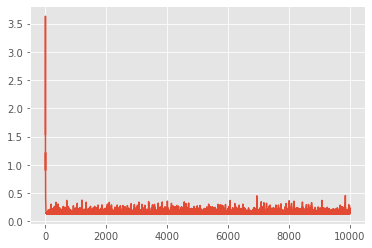

In [7]:
plt.plot(lossHist_adam)

In [10]:
Y_hat = X.dot(W_adam)
X.T.dot(-Y/Y_hat + (1-Y)/(1-Y_hat))

array([[-18.10103095],
       [-65.69349789]])

In [12]:
#Part b 
#(i) 

epochs_b = 400

def GD_BCE(X, Y, W, lr):
    n = len(X) 
    Y_hat = X.dot(W) 

    dW = X.T.dot(-Y/Y_hat + (1-Y)/(1-Y_hat))  
    W -= lr*dW 
    J = binaryCrossEntropyLoss(Y, X.dot(W)) 

    return W, J 


In [13]:
W_gd_bce = np.random.randn(2, 1)
lossHist_gd_bce = [] 
weightHist_gd_bce = []
for epoch in range(epochs_b): 
    W_gd_bce, J = GD_BCE(X, Y, W_gd_bce, lr) 
    lossHist_gd_bce.append(J) 
    weightHist_gd_bce.append(W_gd_bce.copy())

/home/harish/Documents/Python Scripts/NNDL/Assignment2/losses.py:78: RuntimeWarning: invalid value encountered in log
  return -(y_true * np.log(y_pred) + (1-y_true)*np.log(1-y_pred)).mean()


In [20]:
np.log(X.dot(W_gd_bce))

array([[2.55924241],
       [2.74906434],
       [2.90853819],
       [3.04604345],
       [3.16690639],
       [3.27472402],
       [3.27472402],
       [3.37204009],
       [3.46071997],
       [3.54217231],
       [3.61748696],
       [3.68752445],
       [3.75297611],
       [3.81440576],
       [3.92698576],
       [3.9788541 ],
       [4.02816427],
       [4.07515677],
       [4.12003975],
       [4.20417983]])

In [16]:
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])